## NOTES 
#### BMI is body to weight ratio
1) BMI categories 
* Underweight: Below 18.5 
* Normal weight: 18.5 to 24.9 
* Overweight: 25 to 29.9 
* Obese: 30 or greater 
#### Diabetes Pedigree function 
In datasets related to diabetes prediction, "DiabetesPedigreeFunction" (DPF) refers to a measure of the likelihood of a person having diabetes based on their family history of the disease. It's a score that ranges from 0.08 to 2.42, with higher values suggesting a greater chance of diabetes.

## STEPS I WILL TAKE 

* Remove outliers and other null values , 
* perform EDA analysis 
* split the data into x and y 
* Handling imbalanced dataset 
* Perform Feature Scaling and Feature Selection 
* Split the data into training , testing dataset , 
* Use machine learning algorithms 
* check for overfitting
* if overfitting exists , use regularization
* check the training data once more ! 

In [205]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [206]:
df = pd.read_csv("../dataset/diabetes.csv")

In [207]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [208]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Insulin'>

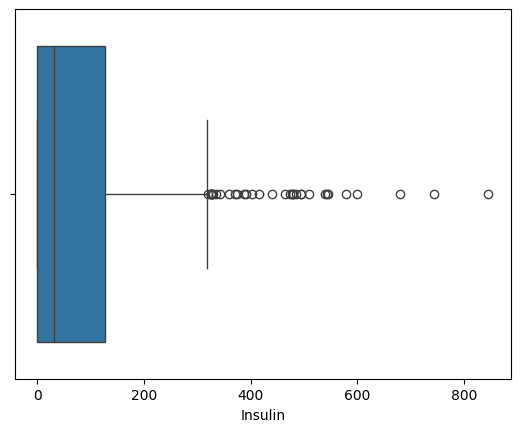

In [209]:
sns.boxplot(x="Insulin",data=df)

In [210]:
q1 = df["Insulin"].quantile(0.25)
q3 = df["Insulin"].quantile(0.75)
IQR = q3 - q1

In [211]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)

In [212]:
min_range,max_range

(-190.875, 318.125)

In [213]:
filtered_df = df[df["Insulin"]<=max_range]

In [214]:
filtered_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: xlabel='DiabetesPedigreeFunction'>

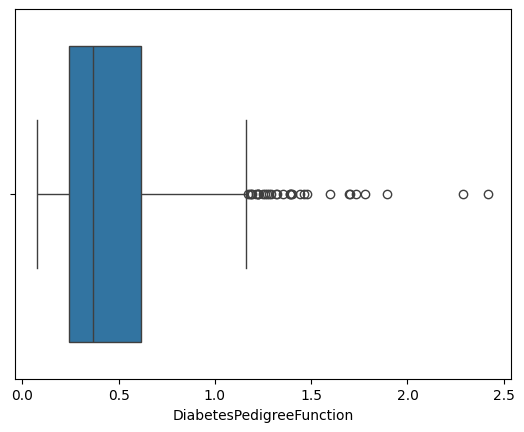

In [215]:
sns.boxplot(x="DiabetesPedigreeFunction",data=filtered_df)

In [216]:
q1 = filtered_df["DiabetesPedigreeFunction"].quantile(0.25)
q3 = filtered_df["DiabetesPedigreeFunction"].quantile(0.75)
IQR = q3 - q1

In [217]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)

In [218]:
min_range,max_range

(-0.3125000000000001, 1.1695000000000002)

In [219]:
filtered_df = filtered_df[filtered_df["DiabetesPedigreeFunction"] <= max_range]

In [220]:
filtered_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [221]:
filtered_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,3.839260,118.477952,68.827881,19.779516,61.512091,31.802276,0.423461,33.136558,0.327169
std,3.362445,30.866993,19.849798,15.933928,78.591171,7.826713,0.243751,11.755273,0.469514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.000000,0.237500,24.000000,0.000000
50%,3.000000,114.000000,72.000000,22.000000,0.000000,32.000000,0.349000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,111.000000,36.300000,0.582500,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,318.000000,67.100000,1.162000,81.000000,1.000000


<Axes: xlabel='DiabetesPedigreeFunction'>

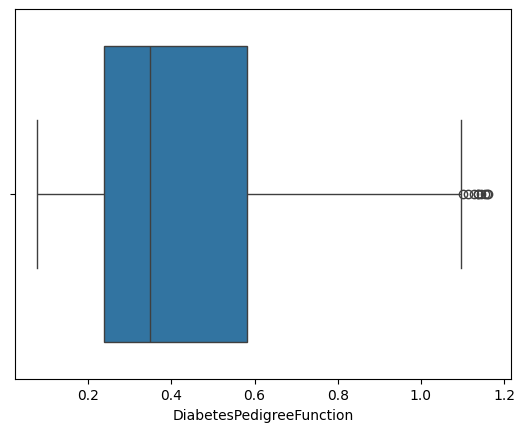

In [222]:
sns.boxplot(x="DiabetesPedigreeFunction",data=filtered_df)

In [223]:
x = filtered_df.iloc[:,:-1]
y = filtered_df["Outcome"]

In [224]:
from imblearn.under_sampling import RandomUnderSampler

In [225]:
rs = RandomUnderSampler()

In [226]:
x,y = rs.fit_resample(x,y)

In [227]:
y.value_counts()

Outcome
0    230
1    230
Name: count, dtype: int64

In [228]:
from sklearn.preprocessing import StandardScaler

In [229]:
ss = StandardScaler()

In [230]:
transformed_data_x = ss.fit_transform(x)

In [231]:
x = pd.DataFrame(transformed_data_x,columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"	,"Age"])

In [232]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.085232,2.184465,0.511688,-1.278900,-0.793336,-0.870734,0.457579,2.689985
1,-0.605084,-0.364663,0.812616,1.350766,1.147805,0.738954,-0.785586,-0.539725
2,0.240074,-0.551185,0.611997,0.599433,-0.793336,0.882910,-0.622548,0.288406
3,0.803513,-1.919010,0.411378,-1.278900,-0.793336,-0.020086,-0.194573,0.536845
4,0.521793,-0.209229,1.314164,-1.278900,-0.793336,-0.530474,-1.148346,-0.374099
...,...,...,...,...,...,...,...,...
455,-0.886804,0.132728,0.912926,1.162933,0.541199,0.490303,2.520009,0.205593
456,-1.168523,-0.022707,0.110450,-1.278900,-0.793336,0.464130,-0.736675,1.447789
457,0.521793,2.060118,1.113545,-1.278900,-0.793336,0.359434,-0.655156,2.607172
458,1.366951,1.438379,0.210759,0.662044,-0.793336,1.471820,-0.145662,0.702471


In [233]:
y

489    0
620    0
141    0
76     0
616    0
      ..
755    1
757    1
759    1
761    1
766    1
Name: Outcome, Length: 460, dtype: int64

In [234]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

In [235]:
lr = LogisticRegression()

In [236]:
fs = SequentialFeatureSelector(lr,k_features="best",forward=True,scoring="accuracy",cv=5)

In [237]:
fs.fit(x,y)

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(1, 8),
                          scoring='accuracy')

In [238]:
fs.feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
list_of_selected_features = (fs.k_feature_names_)

In [263]:
fs.k_score_

0.7543478260869566

In [264]:
list_of_selected_features

('Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction')

In [259]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.085232,2.184465,0.511688,-1.278900,-0.793336,-0.870734,0.457579,2.689985
1,-0.605084,-0.364663,0.812616,1.350766,1.147805,0.738954,-0.785586,-0.539725
2,0.240074,-0.551185,0.611997,0.599433,-0.793336,0.882910,-0.622548,0.288406
3,0.803513,-1.919010,0.411378,-1.278900,-0.793336,-0.020086,-0.194573,0.536845
4,0.521793,-0.209229,1.314164,-1.278900,-0.793336,-0.530474,-1.148346,-0.374099
...,...,...,...,...,...,...,...,...
455,-0.886804,0.132728,0.912926,1.162933,0.541199,0.490303,2.520009,0.205593
456,-1.168523,-0.022707,0.110450,-1.278900,-0.793336,0.464130,-0.736675,1.447789
457,0.521793,2.060118,1.113545,-1.278900,-0.793336,0.359434,-0.655156,2.607172
458,1.366951,1.438379,0.210759,0.662044,-0.793336,1.471820,-0.145662,0.702471


In [269]:
df_selected_x = x[list(list_of_selected_features)].copy()

In [270]:
df_selected_x.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction
0,1.085232,2.184465,0.511688,-1.278900,-0.870734,0.457579
1,-0.605084,-0.364663,0.812616,1.350766,0.738954,-0.785586
2,0.240074,-0.551185,0.611997,0.599433,0.882910,-0.622548
3,0.803513,-1.919010,0.411378,-1.278900,-0.020086,-0.194573
4,0.521793,-0.209229,1.314164,-1.278900,-0.530474,-1.148346
5,0.521793,1.314031,0.210759,-1.278900,-0.805299,-0.549181
6,-0.886804,0.194902,0.010140,-0.464955,-0.896907,0.135579
7,0.803513,-0.675533,0.210759,1.225544,0.581912,-0.956776
8,-0.886804,0.443597,0.611997,-1.278900,0.961431,-0.826346
9,-0.886804,-1.639228,-1.093265,-0.151900,-1.616686,-0.471738


In [274]:
y.shape

(460,)

In [275]:
x.shape

(460, 8)

In [276]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_selected_x,y,random_state=42,test_size=0.2)

In [277]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction
455,-0.886804,0.132728,0.912926,1.162933,0.490303,2.520009
57,-0.886804,-1.110750,0.411378,0.536822,-0.098607,-0.300548
155,-0.886804,-0.768793,0.110450,0.599433,0.765128,-0.108979
290,1.930390,0.350336,-3.500694,-1.278900,2.558032,0.567629
24,-0.605084,-0.053794,-0.491408,-0.151900,-0.386519,1.134186
...,...,...,...,...,...,...
106,-0.886804,-0.644446,0.511688,-0.590178,-1.747555,0.213022
270,-0.886804,-0.209229,0.912926,0.223767,0.228565,-0.145662
348,-0.886804,2.246639,0.311069,0.975100,0.490303,1.778186
435,-0.323365,1.407292,0.210759,-0.089289,-0.373432,-0.695915


In [278]:
lr.fit(x_train,y_train)

LogisticRegression()

In [279]:
lr.score(x_test,y_test)

0.782608695652174

In [280]:
lr.score(x_train,y_train)

0.7581521739130435